In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-num-data/num_data.csv
/kaggle/input/numerical-data/numerical data.csv
/kaggle/input/gwc-plant-disease/GWC.csv
/kaggle/input/plant-disease/best_model.keras
/kaggle/input/plant-disease/model.pkl
/kaggle/input/plant-disease/scaler.pkl
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230726_093014.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230804_114043.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230512_182454.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230801_155448.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230513_173141.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230817_163611.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230822_185220.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230318_115226.jpg
/kaggle/input/plant-disease/image_data/image_data/Anthracnose/20230329_115259.jpg
/kaggle/in

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

data2 =pd.read_csv("/kaggle/input/plant-num-data/num_data.csv")

# Define paths to your datasets
numerical_data = data2[['Ambient_Temperature', 'Ambient_Humidity', 'Soil_Temperature', 'Leaf_Wetness_Duration', 'Soil_Moisture','leaf_spot', 'Anthracnose', 'Healthy']]

# # Load numerical data
# numerical_columns = ['Ambient_Temperature', 'Ambient_Humidity', 'Soil_Temperature', 'Leaf_Wetness_Duration', 'Soil_Moisture', 'leaf_spot', 'Anthracnose', 'Healthy']

# # Extract numerical features and labels using Pandas DataFrame methods
# numerical_features = numerical_data.iloc[:, :-3].values
# labels = numerical_data.iloc[:, -3:].values

# # Split numerical and image data
# x_train, x_test, y_train, y_test = train_test_split(
#     numerical_features, labels, test_size=0.2, random_state=42
# )

# # Split numerical and image data in training and validation
# x_test, x_val, y_test, y_val = train_test_split(
#     x_test, y_test, test_size=0.5, random_state=42
# )

# # Instantiate the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to your training data
# scaler.fit(x_train)

# # Transform training, validation, and test data
# numerical_x_train = scaler.transform(x_train)
# numerical_x_val = scaler.transform(x_val)
# numerical_x_test = scaler.transform(x_test)

# print(numerical_x_train.shape)
# print(numerical_x_test.shape)
# print(numerical_x_val.shape)
# print(numerical_features.shape)

# train_mean = np.mean(x_train, axis=0)
# train_std = np.std(x_train, axis=0)

# print("Mean of x_train:", train_mean)
# print("Standard Deviation of x_train:", train_std)

# # Get class distribution for numerical data
# class_totals = np.sum(labels, axis=0)
# class_labels = ['leaf_spot', 'Anthracnose', 'Healthy']

# # Display class distribution
# for label, total in zip(class_labels, class_totals):
#     print(f"{label}: {total} samples")



In [3]:
# import pandas as pd

# # Copy original data for manipulation
# duplicated_data = numerical_data.copy()

# # Step 1: Filter and remove samples where both Leafspot and Anthracnose are present
# samples_both_diseases = duplicated_data[(duplicated_data['leaf_spot'] == 1) & (duplicated_data['Anthracnose'] == 1)]
# duplicated_data = duplicated_data.drop(samples_both_diseases.index)

# # Step 2: Create redundant samples for both conditions from samples that had both diseases
# # Leafspot only (Class 0)
# redundant_class0 = samples_both_diseases.copy()
# redundant_class0['leaf_spot'] = 1
# redundant_class0['Anthracnose'] = 0
# redundant_class0['Healthy'] = 0  # assuming healthy remains 0 if not both

# # Anthracnose only (Class 1)
# redundant_class1 = samples_both_diseases.copy()
# redundant_class1['leaf_spot'] = 0
# redundant_class1['Anthracnose'] = 1
# redundant_class1['Healthy'] = 0  # assuming healthy remains 0 if not both

# # Step 3: Concatenate the redundant samples back to the original dataset
# duplicated_data = pd.concat([duplicated_data, redundant_class0, redundant_class1])

# # Reset the index after concatenation
# duplicated_data.reset_index(drop=True, inplace=True)

# # Step 4: Verify the new distribution of labels
# print(duplicated_data[['leaf_spot', 'Anthracnose', 'Healthy']].value_counts())
import pandas as pd

# Copy original data for manipulation
duplicated_data = numerical_data.copy()

# Step 1: Modify rows where both Leafspot and Anthracnose are present
duplicated_data.loc[(duplicated_data['leaf_spot'] == 1) & (duplicated_data['Anthracnose'] == 1), 'Anthracnose'] = 0

# Step 2: Verify the new distribution of labels
print(duplicated_data[['leaf_spot', 'Anthracnose', 'Healthy']].value_counts())
print(duplicated_data.shape)


leaf_spot  Anthracnose  Healthy
0          0            1          2186
           1            0          1474
1          0            0           816
Name: count, dtype: int64
(4476, 8)


In [4]:
# Load numerical data
numerical_columns = ['Ambient_Temperature', 'Ambient_Humidity', 'Soil_Temperature', 'Leaf_Wetness_Duration', 'Soil_Moisture', 'leaf_spot', 'Anthracnose', 'Healthy']

# Extract numerical features and labels using Pandas DataFrame methods
numerical_features = duplicated_data.iloc[:, :-3].values
labels = duplicated_data.iloc[:, -3:].values

# Split numerical and image data
x_train, x_test, y_train, y_test = train_test_split(
    numerical_features, labels, test_size=0.2, random_state=42
)

# Split numerical and image data in training and validation
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=42
)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(x_train)

# Transform training, validation, and test data
numerical_x_train = scaler.transform(x_train)
numerical_x_val = scaler.transform(x_val)
numerical_x_test = scaler.transform(x_test)

print(numerical_x_train.shape)
print(numerical_x_test.shape)
print(numerical_x_val.shape)
print(numerical_features.shape)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)

print("Mean of x_train:", train_mean)
print("Standard Deviation of x_train:", train_std)

# Get class distribution for numerical data
class_totals = np.sum(labels, axis=0)
class_labels = ['leaf_spot', 'Anthracnose', 'Healthy']

# Display class distribution
for label, total in zip(class_labels, class_totals):
    print(f"{label}: {total} samples")



(3580, 5)
(448, 5)
(448, 5)
(4476, 5)
Mean of x_train: [33.2340268  72.81958457 22.07529196  1.91530858 32.72245803]
Standard Deviation of x_train: [ 6.76738038 25.07140323  4.40227535  5.61975061 17.76482907]
leaf_spot: 816 samples
Anthracnose: 1474 samples
Healthy: 2186 samples


In [5]:
import joblib

# Saving the scaler
joblib.dump(scaler, 'scaler.pkl')

# Loading the scaler later
scaler = joblib.load('scaler.pkl')


In [6]:
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

DATA_PATH ='/kaggle/input/plant-disease/image_data/image_data'

# Use glob to get image file paths
anthracnose_paths = glob.glob(DATA_PATH + '/Anthracnose/*.jpg')
Healthy_paths = glob.glob(DATA_PATH + '/Healthy/*.jpg')
leaf_spot_paths = glob.glob(DATA_PATH + '/leaf_spot/*.jpg')


# Create a DataFrame with image paths and class labels
anthracnose_df = pd.DataFrame(anthracnose_paths, columns=['image_path'])
Healthy_df = pd.DataFrame(Healthy_paths, columns=['image_path'])
leaf_spot_df = pd.DataFrame(leaf_spot_paths, columns=['image_path'])


# Add class labels
anthracnose_df['class'] = 'Anthracnose'
Healthy_df['class'] = 'Healthy'
leaf_spot_df['class'] = 'leaf_spot'


# Concatenate the two DataFrames into one
df = pd.concat([anthracnose_df, Healthy_df, leaf_spot_df], ignore_index=True)

# df.head()
# # Step 4: Verify the new distribution of labels
print(df[["class"]].value_counts())

# # Split the dataset into training and testing sets
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# # Check the class distribution before augmentation
# class_counts_before = train_df['class'].value_counts()
# print("Class distribution before augmentation:")
# print(class_counts_before)

class      
Anthracnose    2389
Healthy        1148
leaf_spot       658
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame with image paths and labels (train_df for images)
# Split the data into train + validation (80%) and test (20%)
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)

# Split the train+val data into train (80%) and validation (20%)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df['class'], random_state=42)

# Check class distribution (optional)
print("Class distribution in the training set:")
print(train_df['class'].value_counts())

print("Class distribution in the validation set:")
print(val_df['class'].value_counts())

print("Class distribution in the test set:")
print(test_df['class'].value_counts())


Class distribution in the training set:
class
Anthracnose    1528
Healthy         734
leaf_spot       422
Name: count, dtype: int64
Class distribution in the validation set:
class
Anthracnose    383
Healthy        184
leaf_spot      105
Name: count, dtype: int64
Class distribution in the test set:
class
Anthracnose    478
Healthy        230
leaf_spot      131
Name: count, dtype: int64


In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, Reshape, GlobalAveragePooling2D, concatenate
from tensorflow.keras.applications import DenseNet121, MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import BinaryFocalCrossentropy

# ====================================================
# 1. Define Branch Building Functions
# ====================================================

def build_numerical_branch(input_shape=(5,)):
    """Builds the numerical branch using GRU layers.
       Expects numerical data as a 1D vector which is reshaped to (timesteps, features) = (5,1).
    """
    num_input = Input(shape=input_shape, name="numerical_input")
    x = Reshape((input_shape[0], 1))(num_input)  # Now shape = (5,1)
    x = GRU(16, return_sequences=True, name="gru_layer1")(x)
    x = GRU(16, return_sequences=False, name="gru_layer2")(x)
    x = Dense(32, activation='relu', name="num_dense")(x)
    return num_input, x

def build_image_branch_densenet(input_shape=(224,224,3)):
    """Builds the image branch using pre-trained DenseNet121.
       The top is removed and global pooling is applied.
    """
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model (or set True for fine-tuning)
    img_input = base_model.input
    x = base_model.output
    x = GlobalAveragePooling2D(name="densenet_gap")(x)
    x = Dense(32, activation='relu', name="densenet_dense")(x)
    return img_input, x

def build_image_branch_mobilenetv2(input_shape=(224,224,3)):
    """Builds the image branch using pre-trained MobileNetV2.
       The top is removed and global pooling is applied.
    """
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model (or set True for fine-tuning)
    img_input = base_model.input
    x = base_model.output
    x = GlobalAveragePooling2D(name="mobilenet_gap")(x)
    x = Dense(32, activation='relu', name="mobilenet_dense")(x)
    return img_input, x

# ====================================================
# 2. Build Fusion Models
# ====================================================

def build_fusion_model(numerical_input_shape=(5,), image_input_shape=(224,224,3), image_branch_type='densenet'):
    """
    Builds the fusion model by combining the numerical branch (GRU-based) 
    with an image branch (either DenseNet121 or MobileNetV2).
    """
    # Build numerical branch
    num_input, num_features = build_numerical_branch(numerical_input_shape)
    
    # Build image branch based on the specified type
    if image_branch_type == 'densenet':
        img_input, img_features = build_image_branch_densenet(image_input_shape)
    elif image_branch_type == 'mobilenetv2':
        img_input, img_features = build_image_branch_mobilenetv2(image_input_shape)
    else:
        raise ValueError("Unsupported image branch type. Choose 'densenet' or 'mobilenetv2'.")
    
    # Fusion: Concatenate features from both branches
    combined = concatenate([num_features, img_features], name="feature_concatenation")
    x = Dense(64, activation='relu', name="fusion_dense1")(combined)
    x = Dropout(0.3, name="fusion_dropout")(x)
    x = Dense(32, activation='relu', name="fusion_dense2")(x)
    
    # Output layer: 3 units for multi-label classification with sigmoid activation
    output = Dense(3, activation='sigmoid', name="output")(x)
    
    model = Model(inputs=[num_input, img_input], outputs=output, name=f"Fusion_{image_branch_type.upper()}")
    return model

# ====================================================
# 3. Prepare Data Generators (for images and numerical data)
# ====================================================

# NOTE: We now use target_size (224,224) for the image generators to match the pre-trained CNN input.
BATCH_SIZE = 8
IMG_TARGET_SIZE = (224, 224)

# Modify your ImageDataGenerator to use the new target size
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.2  # if you are using this split; else, use your own train/val splits
)

# Assuming that 'df' (a DataFrame with columns "image_path" and "class") is already defined:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,            # use your previously defined train_df
    directory=DATA_PATH,           # base directory for images
    x_col='image_path',
    y_col='class',
    batch_size=BATCH_SIZE,
    seed=1,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical',
    target_size=IMG_TARGET_SIZE
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,              # use your previously defined val_df
    directory=DATA_PATH,
    x_col='image_path',
    y_col='class',
    batch_size=BATCH_SIZE,
    seed=1,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical',
    target_size=IMG_TARGET_SIZE
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,             # test_df for testing images
    directory=DATA_PATH,
    x_col='image_path',
    y_col=None,                  # no labels for test predictions
    batch_size=BATCH_SIZE,
    seed=1,
    color_mode='rgb',
    shuffle=False,
    class_mode=None,
    target_size=IMG_TARGET_SIZE
)

def custom_data_generator(numerical_data, image_data_generator, labels, batch_size):
    num_samples = len(numerical_data)
    image_iter = iter(image_data_generator)  # Convert to iterator
    while True:
        for i in range(0, num_samples, batch_size):
            # Get the numerical batch
            numerical_batch = numerical_data[i:i + batch_size]
            
            # Get the next batch of image data
            try:
                image_batch, _ = next(image_iter)
            except StopIteration:
                image_iter = iter(image_data_generator)  # Restart the generator
                image_batch, _ = next(image_iter)
            
            # Adjust numerical batch size to match the image batch if needed
            if len(numerical_batch) < len(image_batch):
                pad_length = len(image_batch) - len(numerical_batch)
                numerical_batch = np.pad(numerical_batch, ((0, pad_length), (0, 0)), mode='constant')
            elif len(numerical_batch) > len(image_batch):
                numerical_batch = numerical_batch[:len(image_batch)]
            
            label_batch = labels[i:i + len(image_batch)]
            
            # Return a tuple (not a list) for the input pair
            yield (
                (tf.convert_to_tensor(numerical_batch, dtype=tf.float32),
                 tf.convert_to_tensor(image_batch, dtype=tf.float32)),
                tf.convert_to_tensor(label_batch, dtype=tf.float32)
            )

# Ensure that numerical data arrays (numerical_x_train, numerical_x_val, numerical_x_test) and their corresponding labels (y_train, y_val, y_test) are adjusted to be divisible by BATCH_SIZE
def adjust_for_batch(data, labels, batch_size):
    num_samples = len(data)
    num_samples -= num_samples % batch_size
    return data[:num_samples], labels[:num_samples]

numerical_x_train, y_train = adjust_for_batch(numerical_x_train, y_train, BATCH_SIZE)
numerical_x_val, y_val = adjust_for_batch(numerical_x_val, y_val, BATCH_SIZE)
numerical_x_test, y_test = adjust_for_batch(numerical_x_test, y_test, BATCH_SIZE)

steps_train = len(numerical_x_train) // BATCH_SIZE
steps_val = len(numerical_x_val) // BATCH_SIZE

# ====================================================
# 4. Build, Compile, and Train Both Fusion Models
# ====================================================

# Define loss, optimizer, and callbacks (feel free to adjust hyperparameters)
loss = BinaryFocalCrossentropy(
    apply_class_balancing=True,
    alpha=0.75,
    gamma=2.0,
    name='binary_focal_crossentropy'
)
optimizer = Adam(learning_rate=1e-4)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=1)
]

# ----- Model 1: GRU + DenseNet121 Fusion -----
model_densenet = build_fusion_model(
    numerical_input_shape=(5,),
    image_input_shape=(224,224,3),
    image_branch_type='densenet'
)
model_densenet.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
print("Training GRU + DenseNet121 model...")
history_densenet = model_densenet.fit(
    custom_data_generator(numerical_x_train, train_generator, y_train, BATCH_SIZE),
    steps_per_epoch=steps_train,
    epochs=25,
    validation_data=custom_data_generator(numerical_x_val, validation_generator, y_val, BATCH_SIZE),
    validation_steps=steps_val,
    callbacks=callbacks,
    verbose=1
)

# Save the best DenseNet-based model weights
model_densenet.save_weights('best_model_densenet.weights.h5')

# ----- Model 2: GRU + MobileNetV2 Fusion -----
model_mobilenet = build_fusion_model(
    numerical_input_shape=(5,),
    image_input_shape=(224,224,3),
    image_branch_type='mobilenetv2'
)
optimizer_mobilenet = tf.keras.optimizers.Adam()
model_mobilenet.compile(optimizer=optimizer_mobilenet, loss=loss, metrics=['accuracy'])
print("Training GRU + MobileNetV2 model...")
history_mobilenet = model_mobilenet.fit(
    custom_data_generator(numerical_x_train, train_generator, y_train, BATCH_SIZE),
    steps_per_epoch=steps_train,
    epochs=25,
    validation_data=custom_data_generator(numerical_x_val, validation_generator, y_val, BATCH_SIZE),
    validation_steps=steps_val,
    callbacks=callbacks,
    verbose=1
)

# Save the best MobileNetV2-based model weights
model_mobilenet.save_weights('best_model_mobilenet.weights.h5')

# ====================================================
# 5. Evaluate Both Models on Test Data
# ====================================================

steps_test = len(numerical_x_test) // BATCH_SIZE

print("Evaluating GRU + DenseNet121 model on test data:")
test_loss_dn, test_acc_dn = model_densenet.evaluate(
    custom_data_generator(numerical_x_test, validation_generator, y_test, BATCH_SIZE),
    steps=steps_test
)
print(f"Test Loss: {test_loss_dn}, Test Accuracy: {test_acc_dn}")

print("Evaluating GRU + MobileNetV2 model on test data:")
test_loss_mn, test_acc_mn = model_mobilenet.evaluate(
    custom_data_generator(numerical_x_test, validation_generator, y_test, BATCH_SIZE),
    steps=steps_test
)
print(f"Test Loss: {test_loss_mn}, Test Accuracy: {test_acc_mn}")

# You can now compare test_acc_dn vs. test_acc_mn (or other metrics) to decide which fusion technique performs best.


Found 2684 validated image filenames belonging to 3 classes.
Found 672 validated image filenames belonging to 3 classes.
Found 839 validated image filenames.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training GRU + DenseNet121 model...
Epoch 1/25
447/447 ━━━━━━━━━━━━━━━━━━━━ 330s 701ms/step - accuracy: 0.4510 - loss: 0.0722 - val_accuracy: 0.6496 - val_loss: 0.0615 - learning_rate: 1.0000e-04
Epoch 2/25
447/447 ━━━━━━━━━━━━━━━━━━━━ 212s 475ms/step - accuracy: 0.6627 - loss: 0.0582 - val_accuracy: 0.6719 - val_loss: 0.0552 - learning_rate: 1.0000e-04
Epoch 3/25
447/447 ━━━━━━━━━━━━━━━━━━━━ 183s 411ms/step - accuracy: 0.7120 - loss: 0.0528 - val_accuracy: 0.6920 - val_loss: 0.0530 - learning_rate: 1.0000e-04
Epoch 4/25
447/447 ━━━━━━━━━━━━━━━━━━━━ 180s 403ms/step - accuracy: 0.7385 - loss: 0.0502 - val_accuracy: 0.6897 - val_loss: 0.0518 - learning_rate: 1.0000e-04
Epoch 5/25
447/447 ━━━━━━━━━━━━━━━━━━━━ 170s 381ms/step - accuracy: 0.7451 - loss: 0.0476 - val_accuracy: 0.6942 - 

56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 460ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 461ms/step
Fusion GRU + DenseNet121 - Test Data Evaluation
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        87
           1       0.90      0.76      0.82       139
           2       0.89      0.94      0.91       222

    accuracy                           0.85       448
   macro avg       0.83      0.82      0.82       448
weighted avg       0.85      0.85      0.85       448



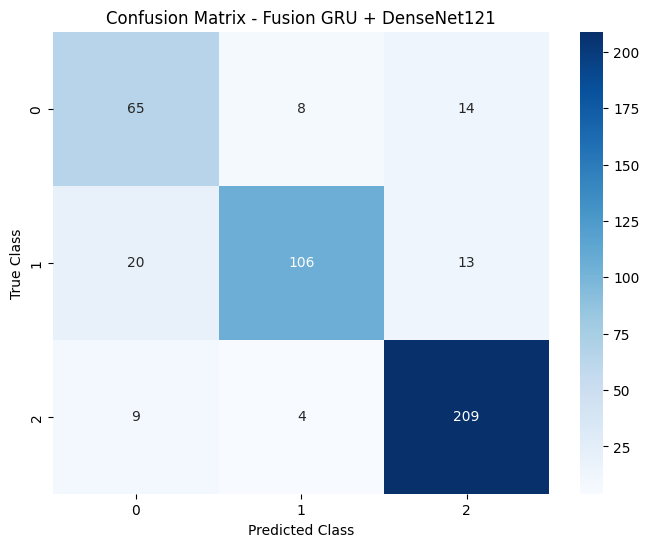

Fusion GRU + MobileNetV2 - Test Data Evaluation
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        87
           1       0.94      0.98      0.96       139
           2       0.98      0.93      0.95       222

    accuracy                           0.95       448
   macro avg       0.93      0.95      0.94       448
weighted avg       0.95      0.95      0.95       448



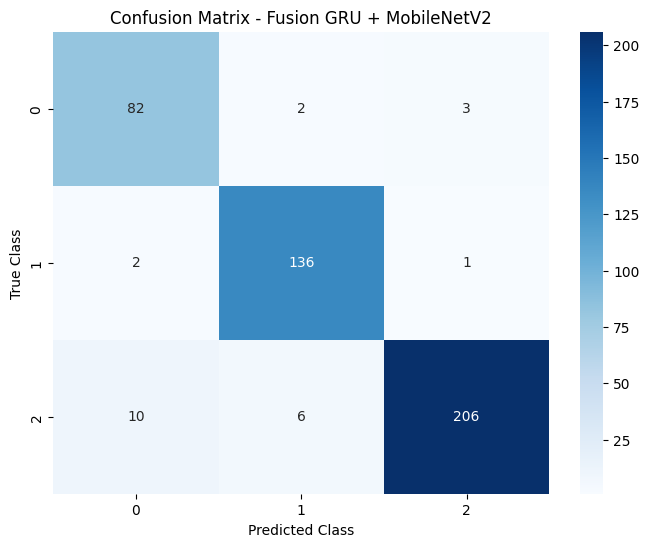

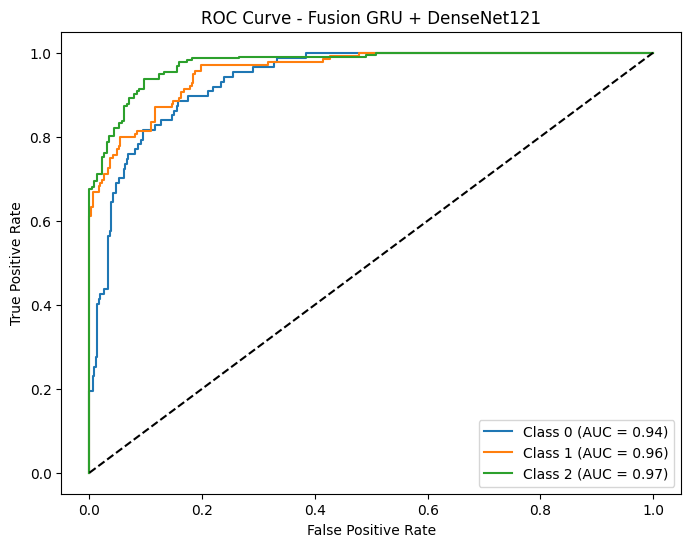

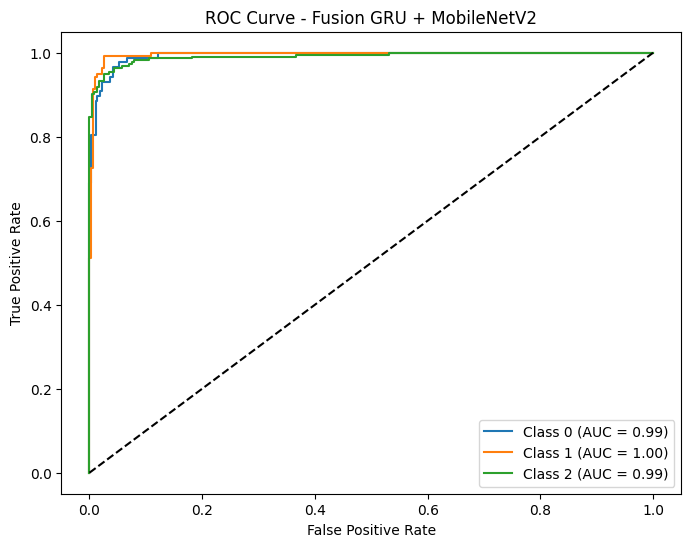

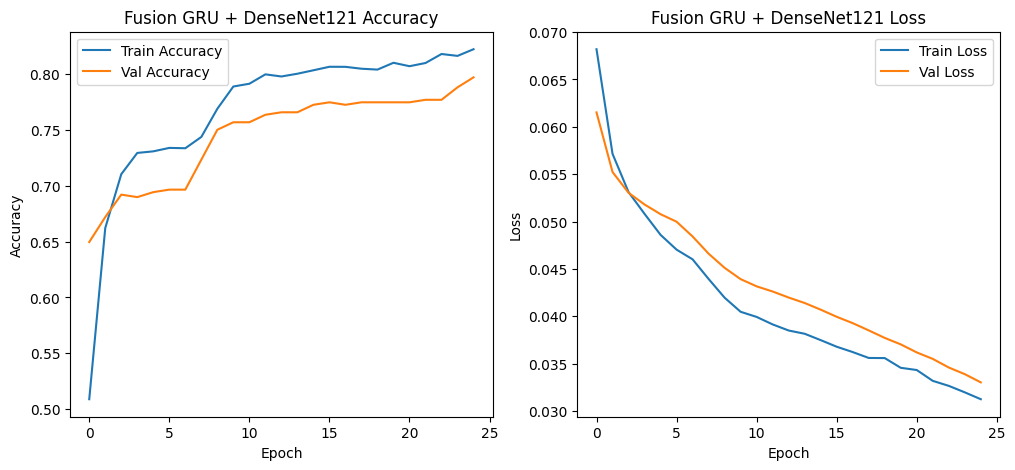

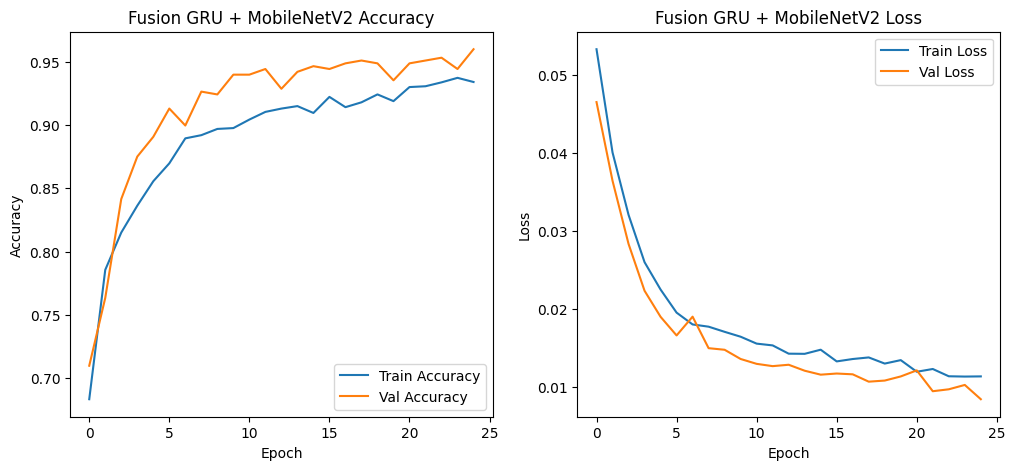

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# ---------------------------
# 1. Define an Evaluation Function
# ---------------------------
def evaluate_model(model, numerical_data, image_data_generator, true_labels, batch_size):
    """
    Evaluates a fusion model on test data.
    
    Returns:
      - preds: model prediction probabilities for each test sample.
      - predicted_classes: integer class predictions.
      - true_classes: integer true labels (using argmax on one-hot encoded labels).
    """
    steps = len(numerical_data) // batch_size
    # Get predictions using our custom data generator for test data.
    preds = model.predict(custom_data_generator(numerical_data, image_data_generator, true_labels, batch_size),
                          steps=steps)
    # For evaluation, assume a multi-class (mutually exclusive) setting:
    predicted_classes = np.argmax(preds, axis=1)
    # Only use as many true labels as were processed by the generator:
    true_labels_used = true_labels[:steps * batch_size]
    true_classes = np.argmax(true_labels_used, axis=1)
    return preds, predicted_classes, true_classes

# ---------------------------
# 2. Evaluate Each Fusion Model on Test Data
# ---------------------------
steps_test = len(numerical_x_test) // BATCH_SIZE

# Evaluate the DenseNet-based fusion model
preds_dn, pred_classes_dn, true_classes_dn = evaluate_model(model_densenet,
                                                            numerical_x_test,
                                                            validation_generator,  # using your validation generator as image source; change if needed
                                                            y_test,
                                                            BATCH_SIZE)

# Evaluate the MobileNetV2-based fusion model
preds_mn, pred_classes_mn, true_classes_mn = evaluate_model(model_mobilenet,
                                                            numerical_x_test,
                                                            validation_generator,
                                                            y_test,
                                                            BATCH_SIZE)

# ---------------------------
# 3. Compute and Plot Confusion Matrices & Classification Reports
# ---------------------------

# For Fusion GRU + DenseNet121
print("Fusion GRU + DenseNet121 - Test Data Evaluation")
cm_dn = confusion_matrix(true_classes_dn, pred_classes_dn)
report_dn = classification_report(true_classes_dn, pred_classes_dn)
print(report_dn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_dn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fusion GRU + DenseNet121")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# For Fusion GRU + MobileNetV2
print("Fusion GRU + MobileNetV2 - Test Data Evaluation")
cm_mn = confusion_matrix(true_classes_mn, pred_classes_mn)
report_mn = classification_report(true_classes_mn, pred_classes_mn)
print(report_mn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_mn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fusion GRU + MobileNetV2")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# ---------------------------
# 4. Plot ROC Curves for Each Model
# ---------------------------
def plot_roc(preds, true_classes, model_name):
    # Binarize the true labels for ROC computation.
    y_true_bin = label_binarize(true_classes, classes=[0, 1, 2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_true_bin.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

plot_roc(preds_dn, true_classes_dn, "Fusion GRU + DenseNet121")
plot_roc(preds_mn, true_classes_mn, "Fusion GRU + MobileNetV2")

# ---------------------------
# 5. Plot Training Loss and Accuracy Curves
# ---------------------------
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))
    # Accuracy curves
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss curves
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()

plot_training_history(history_densenet.history, "Fusion GRU + DenseNet121")
plot_training_history(history_mobilenet.history, "Fusion GRU + MobileNetV2")
